In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
from scipy import stats
from matplotlib.patheffects import withStroke
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')
%matplotlib inline

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 1. nan]


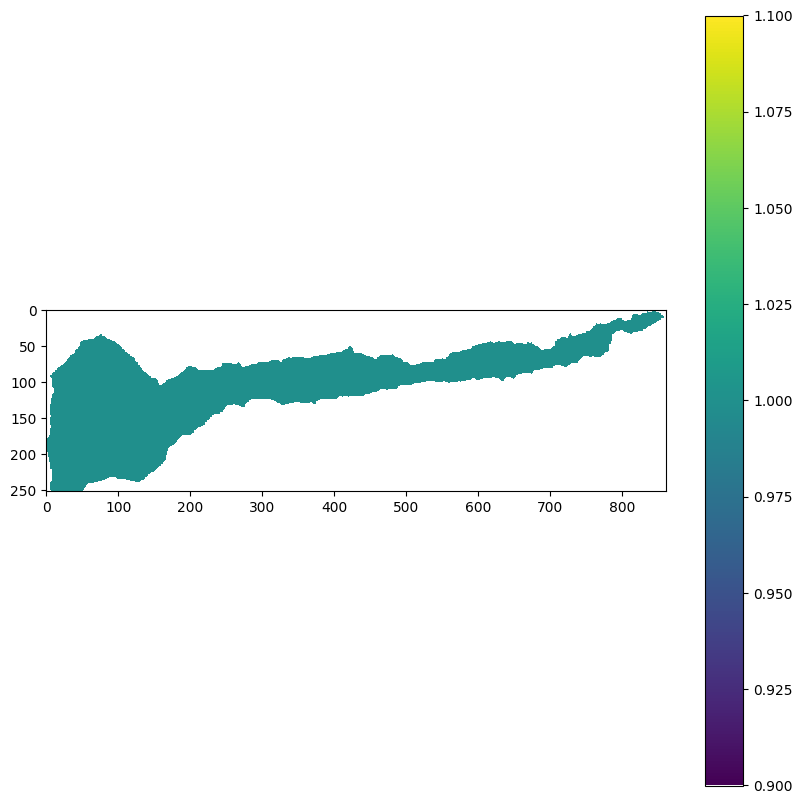

In [2]:
cuencaRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/Cuencacorte2.tif?raw=true')
cuencaB1 = cuencaRaster.read(1)

# Correción para organizar luego los otros valores
cuencaB1 = np.where(cuencaB1 == 255, np.nan, 1)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño
plt.imshow(cuencaB1)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaB1.shape)
print('Valores únicos: ', np.unique(cuencaB1))

InventarioB1
Forma:  (252, 862)
Valores únicos:  [0 1]


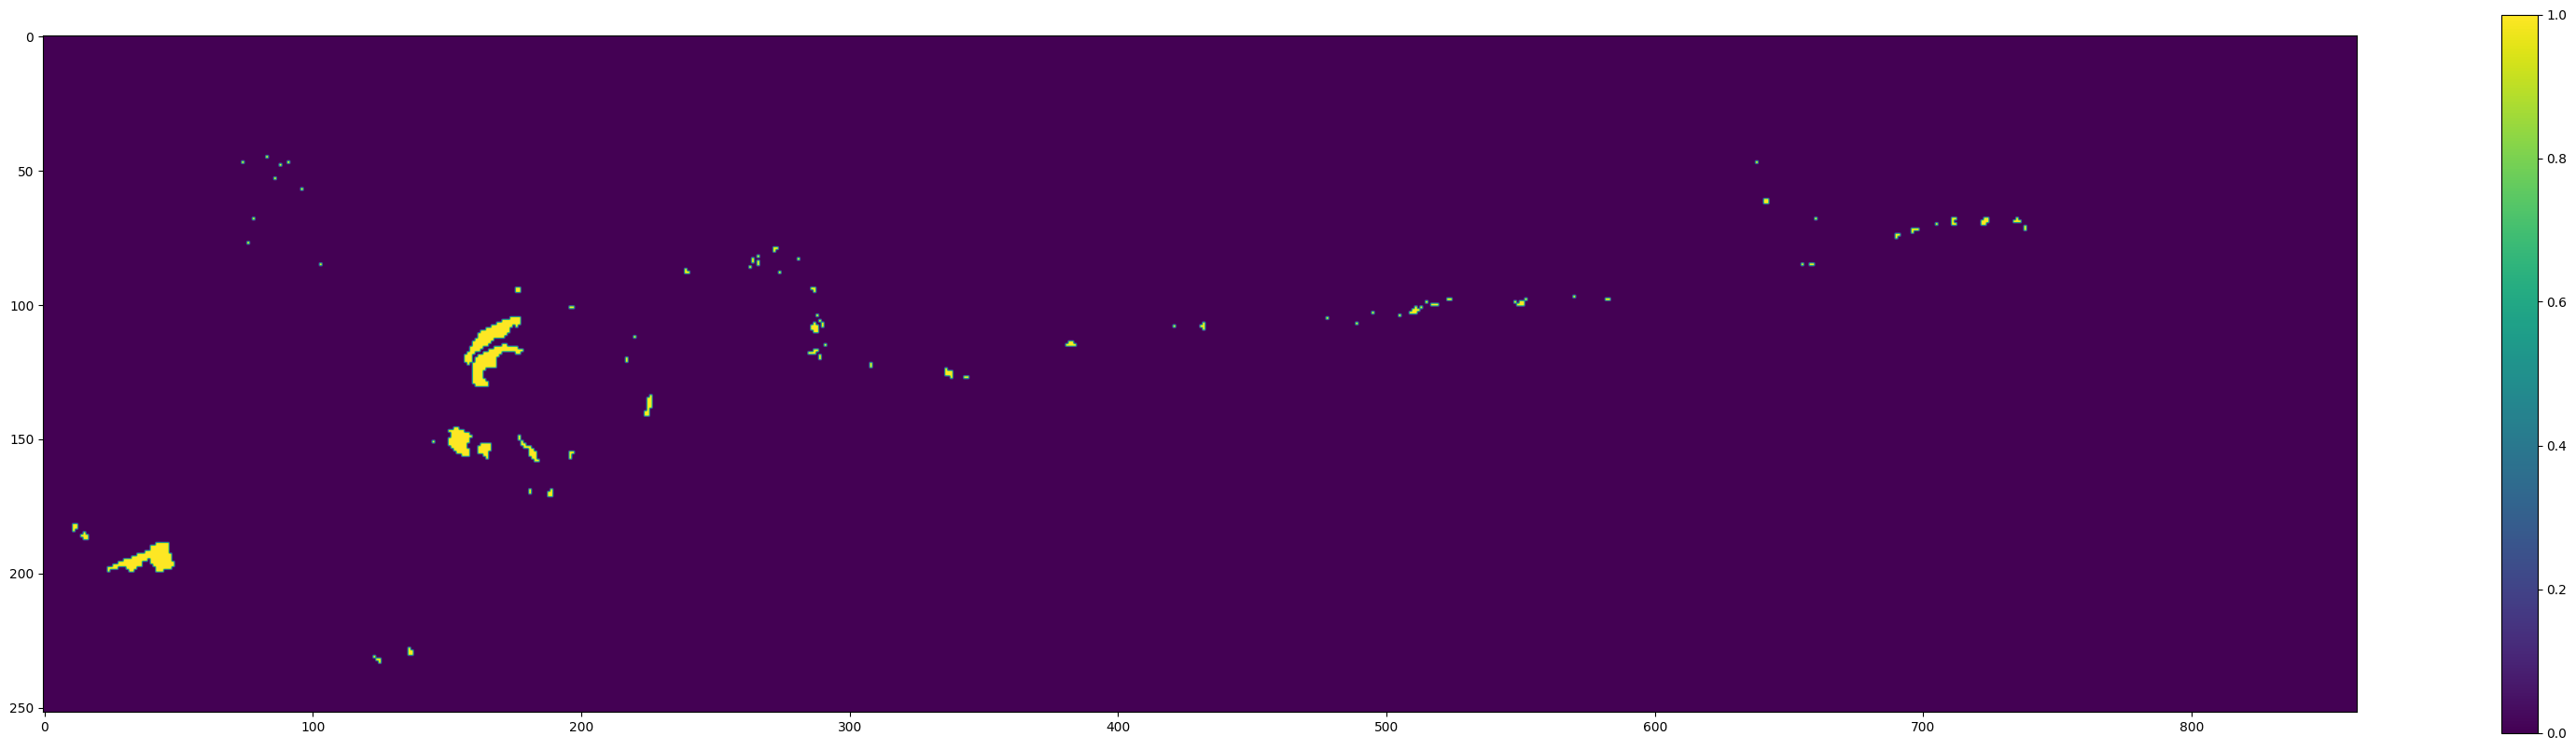

In [3]:
inventarioRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/InvetarioRas2.tif?raw=true')
inventarioB1 = inventarioRaster.read(1)

# Correción para organizar luego los otros valores
inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)
#inventarioB1 = np.where(inventarioB1 == 0, np.nan,  inventarioB1)
#inventarioB1 = np.where(inventarioB1 == 15, np.nan,  inventarioB1)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioB1)
plt.colorbar();

print('InventarioB1')
print('Forma: ', inventarioB1.shape)
print('Valores únicos: ', np.unique(inventarioB1))

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 0.  1. nan]


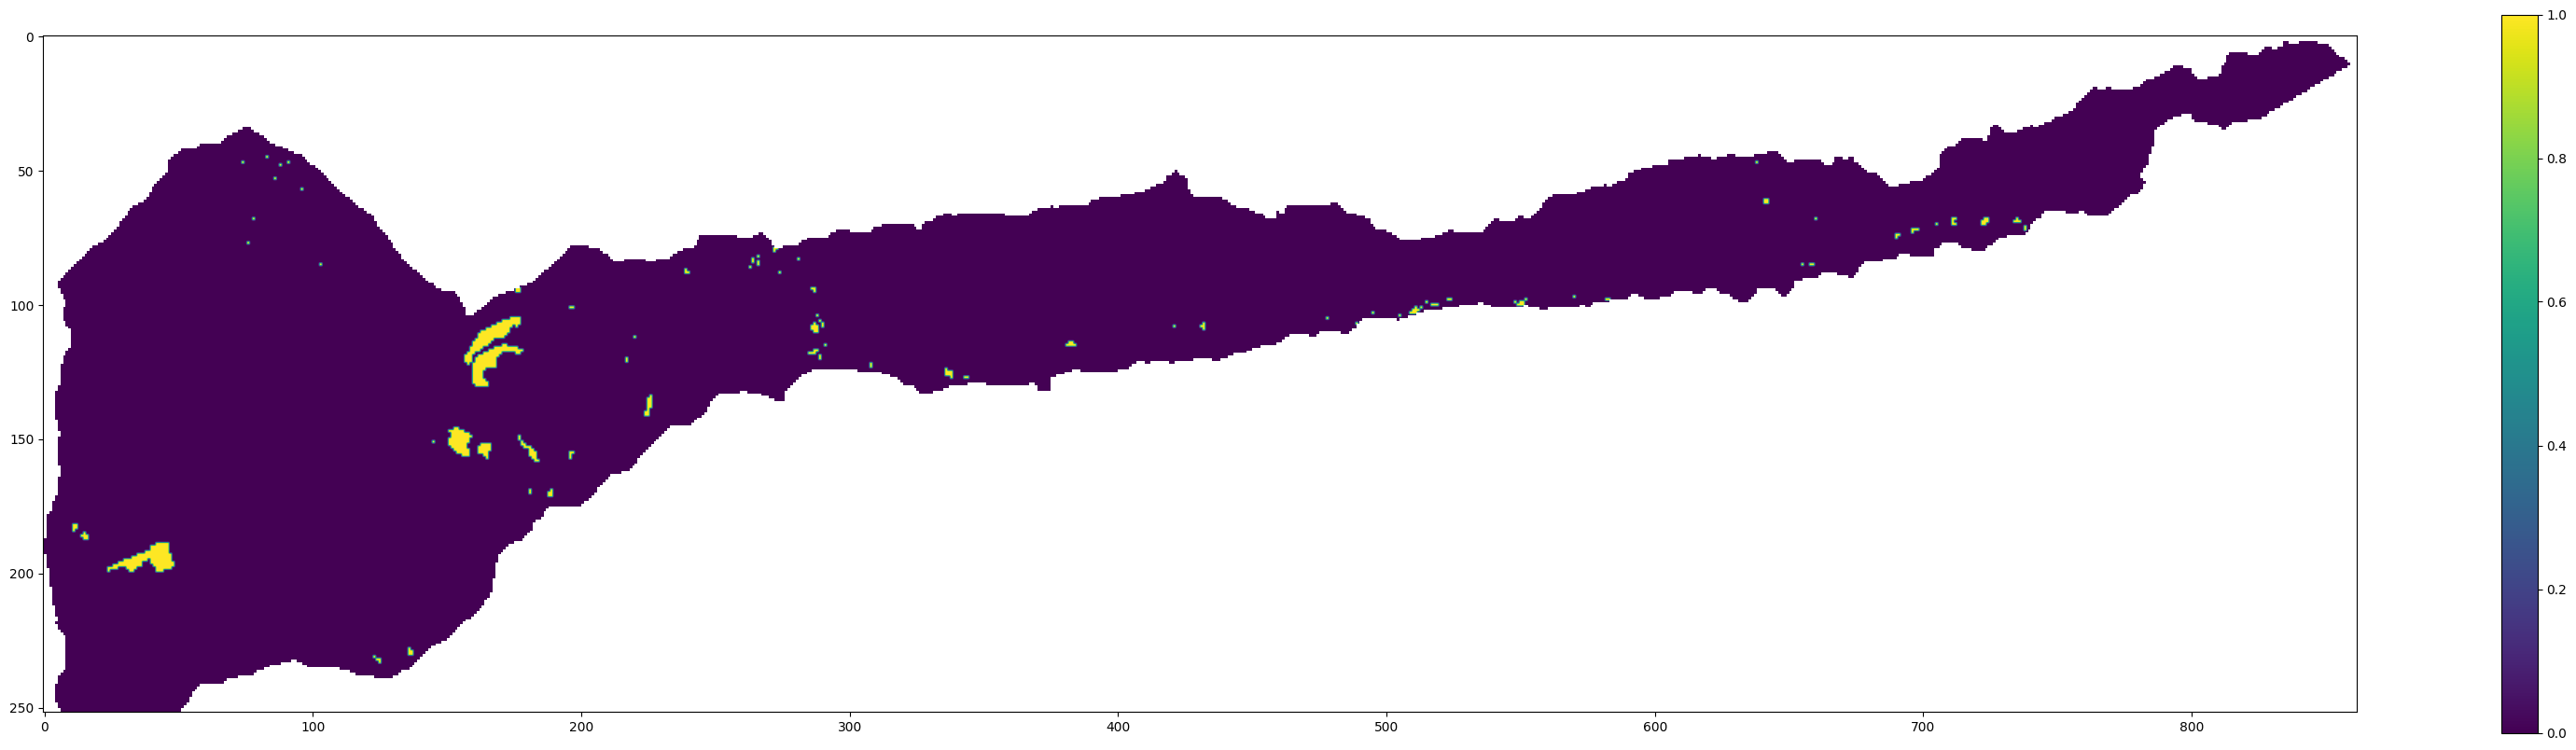

In [4]:
inventarioZona = inventarioB1 * cuencaB1

#inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioZona)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', inventarioZona.shape)
print('Valores únicos: ', np.unique(inventarioZona))

#plt.savefig('InventarioLectura.png', dpi=500, bbox_inches='tight')

Forma:  (252, 862)
Valores únicos:  [-1.000000e+00  0.000000e+00  9.690028e-03 ...  3.599896e+02  3.599927e+02
           nan]


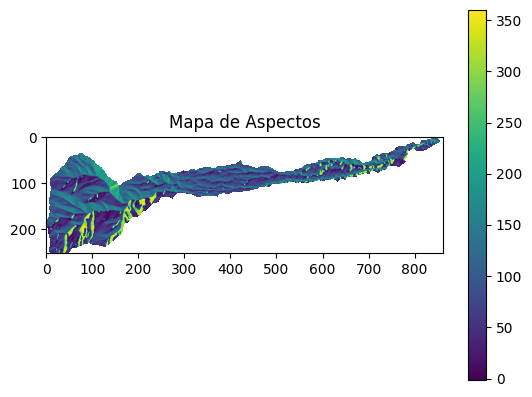

In [5]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AspectoRas2.tif?raw=true')
aspectos=raster.read(1)
aspectos=np.where(aspectos == aspectos.min(), np.nan, aspectos)
plt.imshow(aspectos)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Aspectos')
print('Forma: ', aspectos.shape)
print('Valores únicos: ', np.unique(aspectos))

Forma:  (252, 862)
Valores únicos:  [-59.04177  -51.092407 -49.6877   ...  23.87655   26.930264        nan]


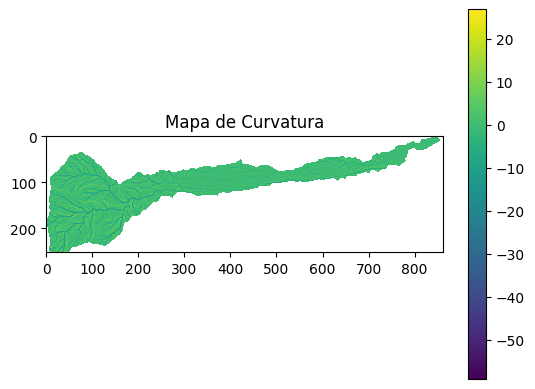

In [6]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/CurvaturaRas2.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Curvatura')
print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))

Forma:  (252, 862)
Valores únicos:  [1582.284  1582.3328 1582.3752 ... 2934.0857 2934.192        nan]


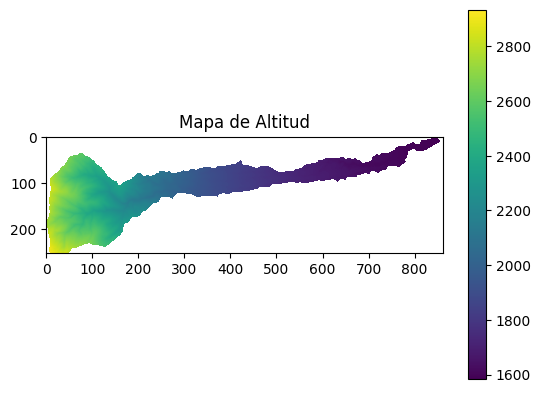

In [7]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AltitudRas2.tif?raw=true')
altitud=raster.read(1)
altitud=np.where(altitud == altitud.min(), np.nan, altitud)
plt.imshow(altitud)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Altitud')
print('Forma: ', altitud.shape)
print('Valores únicos: ', np.unique(altitud))

Forma:  (252, 862)
Valores únicos:  [ 1.  2.  3.  4.  5. nan]


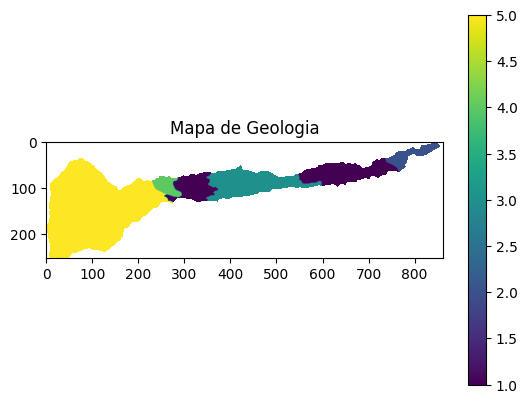

In [8]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/GeoRas2.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia == 255,np.nan,geologia)
geologia=np.where(geologia == geologia.min(), np.nan, geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Geologia')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (252, 862)
Valores únicos:  [ 0.  1.  2.  3.  4. nan]


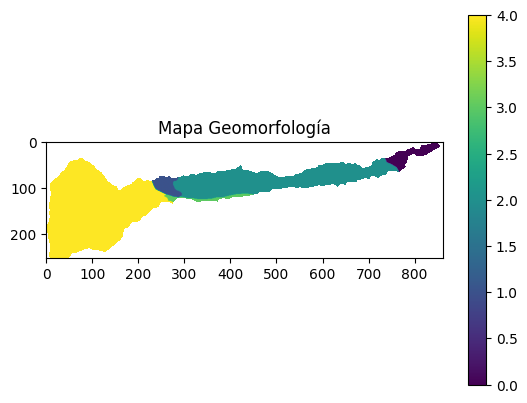

In [9]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/MorfoRas2.tif?raw=true')
geomorfo=raster.read(1)
geomorfo=np.where(geomorfo == 255,np.nan,geomorfo)
plt.imshow(geomorfo)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geomorfología')
print('Forma: ', geomorfo.shape)
print('Valores únicos: ', np.unique(geomorfo))

Forma:  (252, 862)
Valores únicos:  [0.0000000e+00 1.9843397e-03 3.8160379e-03 ... 6.2051132e+01 6.2054195e+01
           nan]


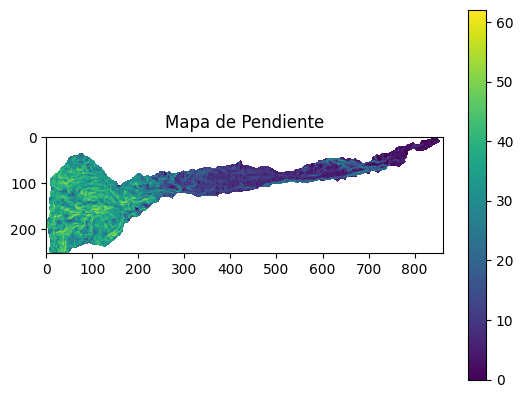

In [10]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/PendienteRas3.tif?raw=true')
slope=raster.read(1)
slope=np.where(slope == slope.min(), np.nan, slope)
plt.imshow(slope)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Pendiente')
print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))

In [11]:
#Convertimos matrices a vectores
inventariovector = inventarioZona.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

aspectosvector = aspectos.ravel()
print('Longitud aspectosvector: ', aspectosvector.shape[0])

curvaturavector = curvatura.ravel()
print('Longitud curvaturavector: ', curvaturavector.shape[0])

altitudvector = altitud.ravel()
print('Longitud altitudvector: ', altitudvector.shape[0])

geologiavector = geologia.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

geomorfovector = geomorfo.ravel()
print('Longitud geomorfovector: ', geomorfovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

#eliminamos los nans del vector
inventariovectorMenM = inventariovector[~np.isnan(inventariovector)]
print('Longitud inventariovectorMenM: ', inventariovectorMenM.shape[0])

aspectosvectorMenM = aspectosvector[~np.isnan(aspectosvector)]
print('Longitud aspectosvectorMenM: ', aspectosvectorMenM.shape[0])

curvaturavectorMenM = curvaturavector[~np.isnan(curvaturavector)]
print('Longitud curvaturavectorMenM: ', curvaturavectorMenM.shape[0])

altitudvectorMenM = altitudvector[~np.isnan(altitudvector)]
print('Longitud altitudvectorMenM: ', altitudvectorMenM.shape[0])

geologiavectorMenM = geologiavector[~np.isnan(geologiavector)]
print('Longitud geologiavectorMenM: ', geologiavectorMenM.shape[0])

geomorfovectorMenM = geomorfovector[~np.isnan(geomorfovector)]
print('Longitud geomorfovectorMenM: ', geomorfovectorMenM.shape[0])

slopevectorMenM = slopevector[~np.isnan(slopevector)]
print('Longitud slopevectorMenM: ', slopevectorMenM.shape[0])

#Realizamos el Dataframe

diccionario={'inventario':inventariovectorMenM, 'aspectos':aspectosvectorMenM, 'curvatura':curvaturavectorMenM,
               'altitud':altitudvectorMenM,'geologia':geologiavectorMenM,
               'geomorfologia':geomorfovectorMenM, 'pendiente':slopevectorMenM}

tablaDatos=pd.DataFrame(diccionario)
print(list(tablaDatos.columns))

tablaDatos.tail(5)

Longitud inventariovector:  217224
Longitud aspectosvector:  217224
Longitud curvaturavector:  217224
Longitud altitudvector:  217224
Longitud geologiavector:  217224
Longitud geomorfovector:  217224
Longitud slopevector:  217224
Longitud inventariovectorMenM:  63282
Longitud aspectosvectorMenM:  63282
Longitud curvaturavectorMenM:  63282
Longitud altitudvectorMenM:  63282
Longitud geologiavectorMenM:  63282
Longitud geomorfovectorMenM:  63282
Longitud slopevectorMenM:  63282
['inventario', 'aspectos', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']


,inventario,aspectos,curvatura,altitud,geologia,geomorfologia,pendiente
63277,0.0,67.359482,-2.209582,2822.357666,5.0,4.0,33.464508
63278,0.0,31.936472,13.475179,2820.012939,5.0,4.0,28.379774
63279,0.0,33.755505,11.376484,2816.632080,5.0,4.0,27.254066
63280,0.0,37.180698,6.638794,2812.989258,5.0,4.0,21.701637
63281,0.0,28.403448,1.510018,2810.272217,5.0,4.0,15.197203


In [36]:
#Métodos basados en datos
#Método estadistico multivariado
#Regresión logistica (RL)

In [37]:
#varContinuas = ['pendiente', 'curvatura', 'aspecto', 'altitud']
varContinuas = ['pendiente', 'aspectos', 'altitud']

In [38]:
tablaDatosRL = tablaDatos.copy()
#for var in varContinuas:
 #   tablaDatosRL[var]=(tablaDatosRL[var]-tablaDatosRL[var].mean())/tablaDatosRL[var].std()
    #tablaDatosNormalizados[var]=(tablaDatosNormalizados[var] - tablaDatosNormalizados[var].min()) / tablaDatosNormalizados[var].max() - tablaDatosNormalizados[var].min()


tablaDatosRL.head()

,inventario,aspectos,curvatura,altitud,geologia,geomorfologia,pendiente
0,0.0,77.488678,0.100469,1586.483276,2.0,0.0,0.153456
1,0.0,75.989136,0.133401,1586.878784,2.0,0.0,0.531839
2,0.0,72.703247,-0.130052,1586.652710,2.0,0.0,1.539204
3,0.0,73.359833,-0.504580,1586.417358,2.0,0.0,0.751905
4,0.0,85.160416,0.065491,1586.276611,2.0,0.0,0.142007


In [39]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ C(geomorfologia) + C(geologia) + pendiente + aspectos + altitud", data = tablaDatosRL).fit()
print(lr.summary())

         Current function value: 0.054019
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:                63282
Model:                          Logit   Df Residuals:                    63270
Method:                           MLE   Df Model:                           11
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                 0.05036
Time:                        02:45:02   Log-Likelihood:                -3418.5
converged:                      False   LL-Null:                       -3599.7
Covariance Type:            nonrobust   LLR p-value:                 5.280e-71
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.5659   1.75e+06  -2.04e-06      1.000   -3.43e+06    3.43e+06
C(geomorfologia)[T.1.0]   

In [40]:
X_RL = tablaDatosRL.drop("inventario", axis=1)
    
y_RL = tablaDatosRL['inventario']

In [41]:
dummy_geologia = pd.get_dummies(X_RL['geologia'], prefix='geo')
column_name = X_RL.columns.values.tolist()
column_name.remove('geologia')
X1_RL = X_RL[column_name].join(dummy_geologia)
X1_RL.drop('geo_2.0',axis=1,inplace=True)

dummy_geomorfologia = pd.get_dummies(X1_RL['geomorfologia'],prefix='geomorfo')
column_name = X1_RL.columns.values.tolist()
column_name.remove('geomorfologia')
X1_RL = X1_RL[column_name].join(dummy_geomorfologia)
X1_RL.drop('geomorfo_0.0',axis=1,inplace=True)

#boolean_columns = X1_LR.select_dtypes(include='bool').columns
#X1_LR[boolean_columns] = X1_LR[boolean_columns].astype(int)

X1_RL.head()

,aspectos,curvatura,altitud,pendiente,geo_1.0,geo_3.0,geo_4.0,geo_5.0,geomorfo_1.0,geomorfo_2.0,geomorfo_3.0,geomorfo_4.0
0,77.488678,0.100469,1586.483276,0.153456,False,False,False,False,False,False,False,False
1,75.989136,0.133401,1586.878784,0.531839,False,False,False,False,False,False,False,False
2,72.703247,-0.130052,1586.652710,1.539204,False,False,False,False,False,False,False,False
3,73.359833,-0.504580,1586.417358,0.751905,False,False,False,False,False,False,False,False
4,85.160416,0.065491,1586.276611,0.142007,False,False,False,False,False,False,False,False


In [42]:
#Ajuste del modelo
from sklearn.linear_model import LogisticRegression
model_RL = LogisticRegression(class_weight='balanced', solver='newton-cg')
model_RL

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [43]:
modelFit_RL = model_RL.fit(X1_RL, y_RL)
print(modelFit_RL.coef_)

#y_pred = result.predict(X1)
y_Prediccion = modelFit_RL.predict_proba(X1_RL)
#y_prob

y_Prediccion1 = modelFit_RL.predict_proba(X1_RL)[:,1]
y_Prediccion1.max()

[[ 0.0014926   0.02185963 -0.0014472   0.04296196  0.1448254   0.14922431
   0.6458399   0.842595    0.6458399  -0.11976828  0.41381803  0.842595  ]]


0.9092027

In [44]:
#Organizando los valores que se van a predecir
pendienteVc1 = (slopevector-np.nanmean(slopevector))/np.nanstd(slopevector)
aspectoVc1 = (aspectosvector-np.nanmean(aspectosvector))/np.nanstd(aspectosvector)
curvaturaVc1 = (aspectosvector-np.nanmean(curvaturavector))/np.nanstd(curvaturavector)
altitudVc1 = (aspectosvector-np.nanmean(altitudvector))/np.nanstd(altitudvector)

#pendienteVc1 = (pendienteVc-np.nanmin(pendienteVc))/(np.nanmax(pendienteVc)-np.nanmin(pendienteVc))
#aspectoVc1 = (aspectoVc-np.nanmin(aspectoVc))/(np.nanmax(aspectoVc)-np.nanmin(aspectoVc))
#curvaturaVc1 = (curvaturaVc-np.nanmin(curvaturaVc))/(np.nanmax(curvaturaVc)-np.nanmin(curvaturaVc))
#altitudVc1 = (altitudVc-np.nanmin(altitudVc))/(np.nanmax(altitudVc)-np.nanmin(altitudVc))

pendienteVc2 = np.nan_to_num(pendienteVc1)
aspectoVc2 = np.nan_to_num(aspectoVc1)
geologiaVc2 = np.nan_to_num(geologiavector)
geomorfologiaVc2 = np.nan_to_num(geomorfovector)
curvaturaVc2 = np.nan_to_num(curvaturaVc1)
altitudVc2 = np.nan_to_num(altitudVc1)

In [50]:
f = {'aspectos':aspectoVc2, 'curvatura':curvaturaVc2, 'altitud':altitudVc2, 'geologia':geologiaVc2, 'geomorfologia':geomorfologiaVc2, 'pendiente':pendienteVc2}

x_map = pd.DataFrame(f)

dummy_geologia = pd.get_dummies(x_map['geologia'],prefix='geo')
column_name = x_map.columns.values.tolist()
column_name.remove('geologia')
x_map = x_map[column_name].join(dummy_geologia)

x_map = x_map.drop('geo_0.0', axis = 1)
x_map = x_map.drop('geo_2.0', axis = 1)## ERROR ¿??

dummy_geomorfologia = pd.get_dummies(x_map['geomorfologia'],prefix='geomorfo')
column_name = x_map.columns.values.tolist()
column_name.remove('geomorfologia')
x_map = x_map[column_name].join(dummy_geomorfologia)

x_map.drop('geomorfo_0.0', axis=1, inplace=True)


#boolean_columns = x_map.select_dtypes(include='bool').columns
#x_map[boolean_columns] = x_map[boolean_columns].astype(int)
x_map.head(63282)

,aspectos,curvatura,altitud,pendiente,geo_1.0,geo_3.0,geo_4.0,geo_5.0,geomorfo_1.0,geomorfo_2.0,geomorfo_3.0,geomorfo_4.0
0,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False
1,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False
2,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False
3,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False
4,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
63277,0.140804,26.532946,-5.341550,-0.606607,True,False,False,False,False,True,False,False
63278,0.151901,26.734976,-5.339109,-0.612449,True,False,False,False,False,True,False,False
63279,0.196663,27.549929,-5.329261,-0.585611,True,False,False,False,False,True,False,False
63280,0.204640,27.695156,-5.327506,-0.374044,True,False,False,False,False,True,False,False


In [53]:
prediccio_RL = model_RL.predict_proba(x_map)[:,1]

#len(prediccio_LR)
#print(y_pred.min(), y_pred.max())

Regresión Logística
Forma:  (252, 862)
Valores únicos:  [0.6269645  0.6287944  0.62880987 ... 0.98339957 0.98342633        nan]


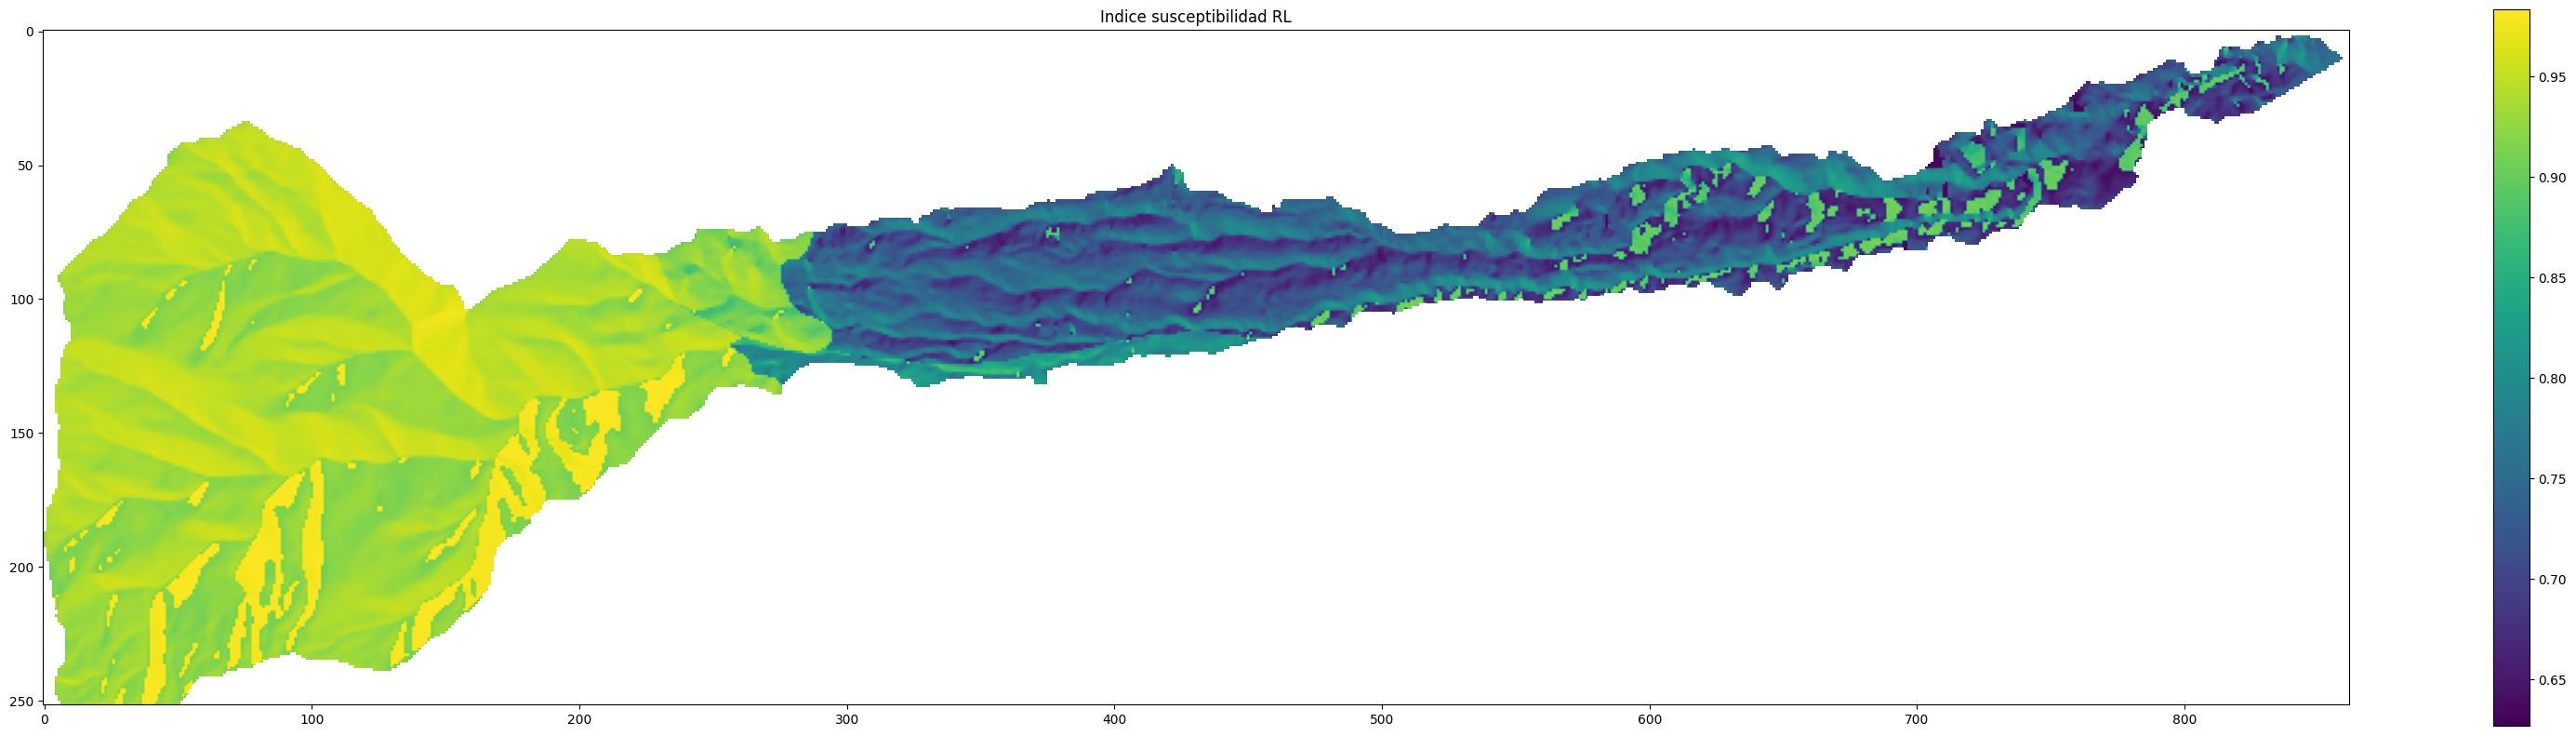

In [55]:
cuencaForma = cuencaB1.copy()

IS_RL = prediccio_RL.reshape(cuencaForma.shape)
IS_RL = np.where(cuencaForma == 1,IS_RL, np.nan)
plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(IS_RL)
plt.colorbar();
plt.title ('Indice susceptibilidad RL')

print('Regresión Logística')
print('Forma: ', cuencaForma.shape)
print('Valores únicos: ', np.unique(IS_RL))

In [56]:
#Evaluacion método estadistico multivariado RL
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X1_RL, y_RL, test_size=0.1)

print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (56953, 12)
Tamaño de labels de entrenamiento: (56953,)
Tamaño de variables de validación: (6329, 12)
Tamaño de labels de validación: (6329,)


In [58]:
#Desempeño del método
result = model_RL.fit(x_train,y_train)

y_train_pred = result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs = result.predict_proba(x_train)[:,1]

y_val_pred = result.predict(x_test) 
y_val_probs = result.predict_proba(x_test)[:,1]

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.58      0.73     56363
         1.0       0.02      0.75      0.04       590

    accuracy                           0.58     56953
   macro avg       0.51      0.66      0.38     56953
weighted avg       0.99      0.58      0.72     56953



Text(0.7, 0.1, 'AUC=0.7067%')

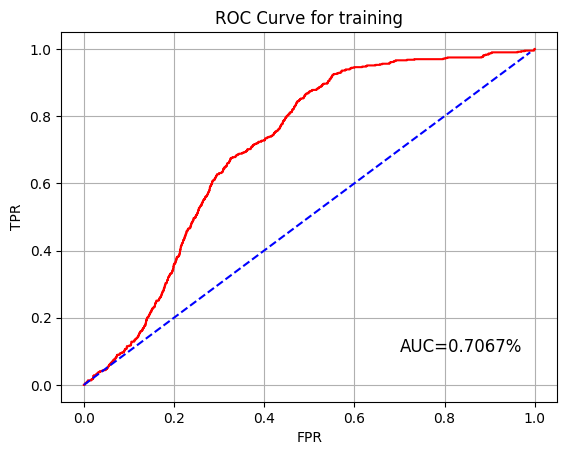

In [59]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb = [i*0.01 for i in range(100)]
yb = [i*0.01 for i in range(100)]

plt.plot(xb,yb,linestyle = '--', color = 'b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc = str(round(metrics.auc(fpr,tpr),4))
plt.text(x = 0.7, y = 0.1, s = 'AUC=' + auc + '%', size = 12)

In [60]:
#Capacidad de prediccion 
confusion_matrix(y_test, y_val_pred)

print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73      6274
         1.0       0.01      0.69      0.03        55

    accuracy                           0.57      6329
   macro avg       0.50      0.63      0.38      6329
weighted avg       0.99      0.57      0.72      6329



Text(0.7, 0.1, 'AUC=0.6949%')

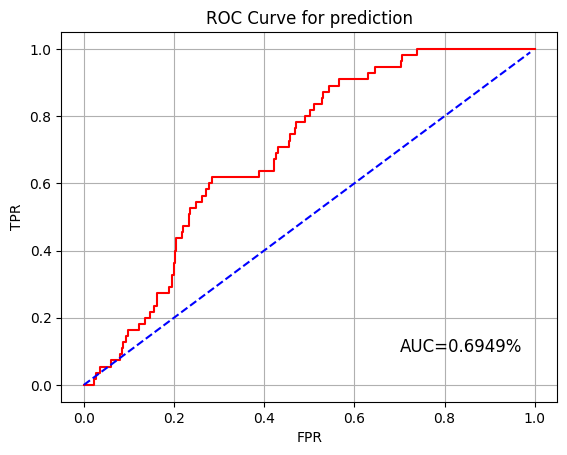

In [61]:
fpr, sensitivity, _ = metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb = [i*0.01 for i in range(100)]
yb = [i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle = '--', color = 'b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x = 0.7, y = 0.1, s = 'AUC=' + auc + '%', size = 12)

In [62]:
#Recalculando
y_pred = model_RL.predict_proba(x_map)[:,1]

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [0.71988297 0.7216415  0.7216676  ... 0.99560344 0.995606          nan]


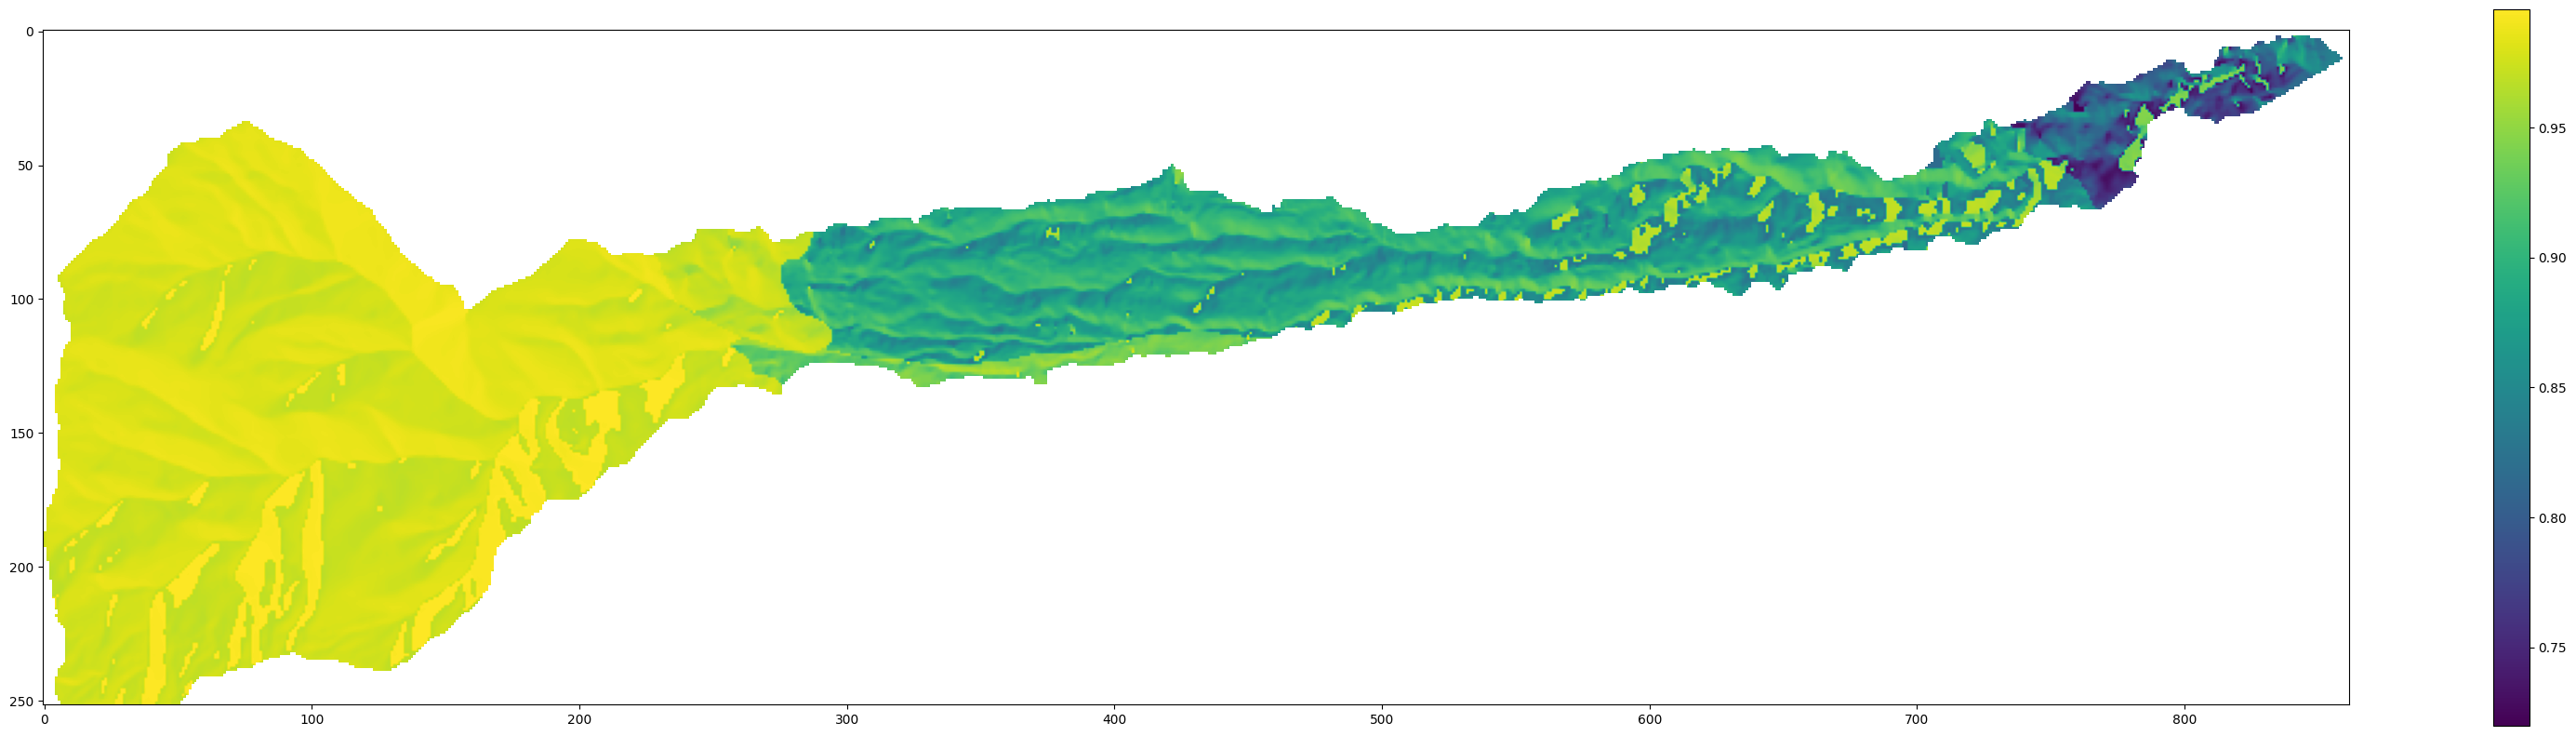

In [63]:
cuencaForma = cuencaB1.copy()

IS = y_pred.reshape(cuencaForma.shape)
IS = np.where(cuencaForma == 1,IS, np.nan)
plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(IS)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaForma.shape)
print('Valores únicos: ', np.unique(IS))